In [7]:
%matplotlib inline
import numpy as np
import time 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats as st

# Task 1
Confidence interval for $a$, unknown $\sigma^{2}$

Length of sample = 100, alpha = 0.05
Critical value of t-statistics = 1.98421695151
Sample mean = 0.0240086092729, confidence interval: [-0.172483116971, 0.220500335517]
Width of interval = 0.392983452487

Length of sample = 1000, alpha = 0.05
Critical value of t-statistics = 1.96234146113
Sample mean = -0.0393120740483, confidence interval: [-0.101492136159, 0.0228679880619]
Width of interval = 0.12436012422

Length of sample = 10000, alpha = 0.05
Critical value of t-statistics = 1.96020126362
Sample mean = -0.00100656283781, confidence interval: [-0.0205722641374, 0.0185591384618]
Width of interval = 0.0391314025992

Length of sample = 100000, alpha = 0.05
Critical value of t-statistics = 1.95998770777
Sample mean = 0.00644475141131, confidence interval: [0.000261225433491, 0.0126282773891]
Width of interval = 0.0123670519556



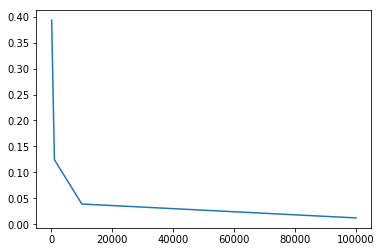

In [16]:
def conf_int_t(n, alpha=0.05):
    X = np.random.normal(size=n)
    alpha = alpha
    mean_x = X.mean()
    var_x = X.var()
    q_t = st.t.ppf((1-alpha/2), df=(n-1))
    #print(st.t.cdf(q_t, df=(n-1))-st.t.cdf(-q_t, df=(n-1)))
    eps = q_t*np.sqrt(var_x/(n-1))
    #print(eps)
    conf_int_t = (mean_x-eps, mean_x+eps)
    print('Length of sample = {0}, alpha = {1}'.format(n, alpha))
    print('Critical value of t-statistics = {0}'.format(q_t))
    print('Sample mean = {0}, confidence interval: [{1}, {2}]'.format(mean_x, conf_int_t[0], conf_int_t[1]))
    print('Width of interval = {0}\n'.format(2*eps))
    return 2*eps
wids = []
lens = [10**k for k in range(2,6)]
for length in lens:
    wids.append(conf_int_t(length))
plt.plot(lens, wids)
#xlim = plt.xlim((lens[0], lens[-1]))

# Task 2
Confidence interval for $a$ in case of unknown distribution

0.95
Length of sample = 100, alpha = 0.05
Critical value of N(0,1) = 1.95996398454
Sample mean = -0.0531215254994, confidence interval: [-0.252184067511, 0.145941016512]
Width of interval = 0.398125084023

0.95
Length of sample = 1000, alpha = 0.05
Critical value of N(0,1) = 1.95996398454
Sample mean = 0.0529767724849, confidence interval: [-0.00793900533823, 0.113892550308]
Width of interval = 0.121831555646

0.95
Length of sample = 10000, alpha = 0.05
Critical value of N(0,1) = 1.95996398454
Sample mean = 0.00536938715051, confidence interval: [-0.0141258093624, 0.0248645836634]
Width of interval = 0.0389903930258

0.95
Length of sample = 100000, alpha = 0.05
Critical value of N(0,1) = 1.95996398454
Sample mean = -0.00128649459004, confidence interval: [-0.00749678309518, 0.0049237939151]
Width of interval = 0.0124205770103



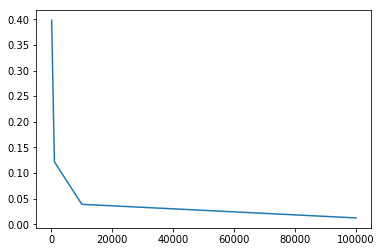

In [17]:
def conf_int_clt(n, alpha=0.05):
    X = np.random.normal(size=n)
    alpha = alpha
    mean_x = X.mean()
    var_x = X.var(ddof=1)
    q_clt = st.norm.ppf(0.5+(1-alpha)/2.)
    #print(st.norm.cdf(q_clt)-st.norm.cdf(-q_clt)) # tests corectness of percentile
    eps = q_clt*np.sqrt(var_x/n)
    conf_int_clt = (mean_x-eps, mean_x+eps)
    print('Length of sample = {0}, alpha = {1}'.format(n, alpha))
    print('Critical value of N(0,1) = {0}'.format(q_clt))
    print('Sample mean = {0}, confidence interval: [{1}, {2}]'.format(mean_x, conf_int_clt[0], conf_int_clt[1]))
    print('Width of interval = {0}\n'.format(2*eps))
    return 2*eps

wids = []
lens = [10**k for k in range(2,6)]
for length in lens:
    wids.append(conf_int_clt(length))
plt.plot(lens, wids)
#xlim = plt.xlim((lens[0], lens[-1]))

In [18]:
def conf_int_chi2(n, alpha=0.05):
    X = np.random.normal(size=n)
    alpha = alpha
    mean_x = X.mean()
    var_x = X.var()
    q_chi_left = st.chi2.ppf(alpha/2., df=(n-1))
    q_chi_right = st.chi2.ppf(1-alpha/2., df=(n-1))
    eps1 = n*var_x/q_chi_right
    eps2 = n*var_x/q_chi_left
    conf_int_chi = (eps1, eps2)
    print('Length of sample = {0}, alpha = {1}'.format(n, alpha))
    print('Left critical value of Chi2_(n-1) = {0}, right critical value of Chi2_(n-1) = {1} '.format(q_chi_left, q_chi_right))
    print('Сonfidence interval: [{0}, {1}]'.format(conf_int_chi[0], conf_int_chi[1]))
    print('Width of interval = {0}\n'.format(eps2-eps1))
    return eps2-eps1


In [19]:
wids = []
lens = [10**k for k in range(2,6)]
for length in lens:
    wids.append(conf_int_chi2(length))
#plt.plot(lens, wids)

Length of sample = 100, alpha = 0.05
Left critical value of Chi2_(n-1) = 73.3610801913, right critical value of Chi2_(n-1) = 128.421988644 
Сonfidence interval: [0.627986056937, 1.09931884948]
Width of interval = 0.471332792543

Length of sample = 1000, alpha = 0.05
Left critical value of Chi2_(n-1) = 913.300998302, right critical value of Chi2_(n-1) = 1088.48706773 
Сonfidence interval: [0.916718345352, 1.09255991783]
Width of interval = 0.175841572482

Length of sample = 10000, alpha = 0.05
Left critical value of Chi2_(n-1) = 9723.73223701, right critical value of Chi2_(n-1) = 10278.0563203 
Сonfidence interval: [0.992516950859, 1.04909769943]
Width of interval = 0.0565807485723

Length of sample = 100000, alpha = 0.05
Left critical value of Chi2_(n-1) = 99124.3776833, right critical value of Chi2_(n-1) = 100877.410923 
Сonfidence interval: [0.99403281059, 1.01161246757]
Width of interval = 0.0175796569835



(700, 2500)

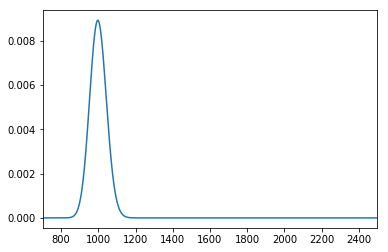

In [6]:
xs = np.arange(0,3000,0.01)
ys = st.chi2.pdf(xs,df=999)
plt.plot(xs, ys)
plt.xlim(700,2500)